## **Q1 : Model Evaluation of imbalanced datasets**

### **Why should you not use accuracy for model evaluation in an imbalanced dataset?**

**Answer:**

Accuracy is not a good metric for evaluating models on imbalanced datasets. In a dataset where 90% of the data belongs to class 0 and 10% belongs to class 1, a model that predicts everything as class 0 would still have 90% accuracy, despite completely failing to identify the minority class (class 1). This leads to **misleading results** because accuracy doesn’t consider the distribution of classes.

**Accuracy Formula**:

```python
Accuracy = (True Positives + True Negatives) / (Total Samples)
```

Where:
- **True Positives (TP)**: Correct predictions for the positive class.
- **True Negatives (TN)**: Correct predictions for the negative class.

In imbalanced datasets, this formula often gives a high value, even if the model fails to correctly identify the minority class.

Instead, other metrics like **Precision, Recall, F1-Score, and AUC-ROC** are more informative in evaluating performance, particularly for the minority class.

- **Precision**: Measures how many of the predicted positive cases are actually positive.
- **Recall**: Measures how many of the actual positive cases were predicted correctly.
- **F1-Score**: Harmonic mean of Precision and Recall, balancing both metrics.
- **AUC-ROC**: Evaluates how well the model can distinguish between the two classes by plotting True Positive Rate (Recall) against False Positive Rate.

**Example response for an interview**:  
_"In an imbalanced classification problem, accuracy can give an illusion of high performance when the model is just predicting the majority class. Instead, metrics like Precision, Recall, and F1-Score are more effective in evaluating performance, especially in identifying the minority class. AUC-ROC can also help by showing how well the model discriminates between classes."_

**Python Implementation Example:**

```python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example true and predicted values
y_true = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
y_pred = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
```

In the above example, despite the **accuracy** being decent, metrics like **precision**, **recall**, and **F1-score** will provide a better picture for imbalanced datasets.

---

### **Explain oversampling and how it can help with imbalanced data.**

**Answer:**

**Oversampling** is a technique used to handle imbalanced datasets by increasing the number of instances in the minority class. This is done by **duplicating** samples or creating synthetic samples. Oversampling ensures that the model is trained on a more balanced dataset, preventing it from being biased towards the majority class.

**Popular Oversampling Techniques:**
1. **Random Oversampling**: Randomly duplicates samples from the minority class until the classes are balanced. While simple, it can lead to **overfitting** because the model may memorize these duplicated instances.
2. **SMOTE (Synthetic Minority Over-sampling Technique)**: A more advanced technique where new synthetic samples are created by interpolating between existing minority class samples.

**Example response for an interview**:  
_"Oversampling helps in balancing the data by either duplicating or synthesizing more minority class samples, allowing the model to pay more attention to the minority class. Techniques like SMOTE are widely used to generate synthetic data points for the minority class, thereby improving the model's ability to generalize."_

**Formula** (for SMOTE synthetic samples creation):

```python
New Sample = Sample_min + λ * (Sample_nearest - Sample_min)
```

Where:
- `Sample_min`: A sample from the minority class.
- `Sample_nearest`: The nearest neighbor of `Sample_min`.
- `λ`: A random number between 0 and 1.

**Python Implementation (using SMOTE):**

```python
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           weights=[0.9], flip_y=0, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Plot original vs resampled data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(X[:, 0], X[:, 1], c=y)
axs[0].set_title('Original Data')

axs[1].scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled)
axs[1].set_title('Resampled Data (SMOTE)')

plt.show()
```

---

### **Explain undersampling and its benefits and drawbacks.**

**Answer:**

**Undersampling** is the opposite of oversampling. It reduces the size of the majority class to balance the dataset. By removing some of the majority class instances, we can make the dataset more balanced and avoid biasing the model towards the majority class.

**Benefits:**
- It is computationally less expensive since the dataset becomes smaller.
- Can work well when there’s a lot of redundancy in the majority class.

**Drawbacks:**
- By removing data, you risk losing important information from the majority class.
- This can lead to **underfitting**, where the model doesn't learn enough because important patterns in the majority class may be discarded.

**Example response for an interview**:  
_"Undersampling is useful when we have large datasets, as it reduces the training data size by removing instances from the majority class. While it balances the dataset, it comes with the risk of losing valuable data from the majority class, potentially underfitting the model."_

**Example Formula** for undersampling:  
If we have 1000 samples in the majority class and 100 in the minority class, we randomly select 100 samples from the majority class to create a balanced dataset.

**Python Implementation Example:**

```python
from imblearn.under_sampling import RandomUnderSampler

# Original dataset (same as above)
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           weights=[0.9], flip_y=0, random_state=42)

# Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Plot original vs resampled data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(X[:, 0], X[:, 1], c=y)
axs[0].set_title('Original Data')

axs[1].scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled)
axs[1].set_title('Resampled Data (Undersampling)')

plt.show()
```

---

### **What is SMOTE, and how does it work?**

**Answer:**

**SMOTE (Synthetic Minority Over-sampling Technique)** is an oversampling technique that creates synthetic examples rather than simply duplicating minority class samples. 

**How it works:**
- For each minority class sample, SMOTE selects its **k-nearest neighbors**.
- It then creates a new synthetic sample by randomly choosing one of the neighbors and generating a point along the line connecting the two samples.
- This way, it generates new instances that are not mere copies but fall in between existing minority class examples.

**Benefits:**
- **Reduces overfitting**: Since it generates new synthetic samples rather than duplicating data, the model doesn’t memorize the data.
- **Balances the data**: Improves model performance by making the data distribution more balanced.

**Example response for an interview**:  
_"SMOTE is a technique that generates synthetic samples for the minority class by interpolating between existing samples and their nearest neighbors. This helps the model to generalize better and avoid overfitting, which can occur in simple random oversampling methods."_ 

**Formula** (same as in Q2):

```python
New Sample = Sample_min + λ * (Sample_nearest - Sample_min)
```

**Python Implementation**: (already provided in Q2)

---

### **How can you alter the cost function to address imbalanced data?**

**Answer:**

In **imbalanced classification problems**, we can **alter the cost function** of the model to penalize misclassifying the minority class more than the majority class. This approach assigns **higher weights** to the minority class during training, which forces the model to focus more on correctly predicting minority class samples.

**Examples of altering cost functions:**
1. **Weighted Loss Function**: In algorithms like Logistic Regression or SVM, we can add class weights to the loss function. This means that the model will incur a larger penalty for misclassifying minority class samples, forcing it to pay more attention to those samples.
    - In Scikit-Learn, you can use `class_weight='balanced'` in many classifiers (like Logistic Regression, SVM, etc.) to automatically adjust the weights inversely proportional to class frequencies.
2. **Focal Loss** (used in deep learning): A variant of cross-entropy loss that adds a modulating term to focus learning more on hard-to-classify examples (usually from the minority class).

**Mathematical Intuition** (for weighted loss):
Let `W_0` and `W_1` represent the weights assigned to class 0 and class 1, respectively. The loss function can be modified as:

```python
L = W_0 * L_0 + W_1 * L_1
```
Where:
- `L_0` and `L_1` represent the individual loss for class 0 and class 1.
- `W_0` and `W_1` are inversely proportional to the class frequencies.

**Example response for an interview**:  
_"By altering the cost function, we can assign higher weights to the minority class, ensuring the model pays more attention to misclassifications in that class. This technique works well in logistic regression, SVMs, and even deep learning models, using weighted loss or focal loss."_ 

**Python Implementation Example:**

```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, weights=[0.9], flip_y=0, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply weighted classifier
clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))
```

In this implementation, the `class_weight='balanced'` parameter automatically assigns weights to classes inversely proportional to their frequencies in the data.

---

### **Summary of Formulas and Python Examples**

1. **Accuracy Formula**:
   **Why accuracy is a poor metric**: It can mislead you into thinking your model is performing well even if it's just predicting the majority class.
   - Formula: `Accuracy = (TP + TN) / (Total Samples)`

   Python: `accuracy_score`

2. **Oversampling Formula (SMOTE)**: Duplicates or generates synthetic samples for the minority class.
   ```python
   New Sample = Sample_min + λ * (Sample_nearest - Sample_min)
   ```
   Python: `SMOTE`

3. **Undersampling Formula**: Reduces the number of majority class instances to balance the dataset.

   No specific formula; it involves randomly removing instances from the majority class.

4. **Weighted Loss Formula**: Generates synthetic data points for the minority class to balance the dataset and reduce overfitting.

   ```python
   Weighted Loss = W_0 * Loss_0 + W_1 * Loss_1
   ```
   Python: `class_weight='balanced'`

5. **Altering cost function**: Assign higher weights to the minority class during training to make the model focus on correctly predicting minority class examples.

Each technique has its advantages and drawbacks, and in practice, combining these methods (like oversampling with altering the cost function) can often yield the best results.

---


## **Q2 : Showcase your understanding of K-Means and the Elbow Method**

1. **How to choose the optimal value of K?**
2. **What is the Elbow method?**
3. **What is WCSS (Within-Cluster Sum of Squares)?**
4. **Explain Euclidean distance and its related formulas.**
5. **Python implementation of the Elbow method for determining the optimal K.**

---

### **How to Choose the Optimal Value of K?**

**Answer:**
In clustering (specifically in K-Means), the value of `K` represents the number of clusters. The selection of the optimal number of clusters is crucial because it directly impacts the model's performance. If you choose a very small `K`, clusters might be too broad, missing finer groups within the data. On the other hand, a very large `K` may lead to overfitting by creating too many small clusters. 

The **Elbow Method** is the most commonly used technique to choose the optimal value of `K`. This method helps to find the "elbow point" where adding more clusters (increasing `K`) doesn’t significantly improve the model.

---

### **What is the Elbow Method?**

**Answer:**
The **Elbow Method** is used to select the optimal number of clusters by fitting the model with a range of values for `K` and calculating the **Within-Cluster Sum of Squares (WCSS)** for each `K`. 

- As `K` increases, the **WCSS** decreases, but there comes a point (elbow point) where the rate of decrease sharply slows down. This is where the additional clusters stop improving the model much, and the optimal `K` is often chosen at this point.

---

### **What is WCSS (Within-Cluster Sum of Squares)?**

**Answer:**
**WCSS** is a measure of the variance within each cluster. It helps to quantify the compactness of the clusters, which is minimized during the K-means clustering process.

#### **WCSS Formula**:

```python
WCSS = Σ Σ || x_i - μ_j ||²
```

Where:
- `x_i`: Each data point in the cluster.
- `μ_j`: The centroid of the cluster.
- `|| x_i - μ_j ||²`: The Euclidean distance between the data point `x_i` and the centroid `μ_j`.

---

### **What is Euclidean Distance?**

**Answer:**
The **Euclidean Distance** is the straight-line distance between two points in Euclidean space. It’s the most common distance metric used in K-Means clustering to calculate the distance between points and centroids.

#### **Euclidean Distance Formula**:

In 2D space, the Euclidean distance between two points \( P(x_1, y_1) \) and \( Q(x_2, y_2) \) is:

```python
Distance = √((x_2 - x_1)² + (y_2 - y_1)²)
```

In n-dimensional space:

```python
Distance = √(Σ (x_i - y_i)²)  # Summing over all dimensions i
```

Where:
- `x_i` and `y_i` are the coordinates of the two points.

---

### **Python Implementation of the Elbow Method**

Now, let's implement the Elbow Method in Python using `scikit-learn` to choose the optimal `K` for K-Means clustering.

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Create a dataset with random data
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=0.6)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], s=50, c='blue', marker='o')
plt.title('Generated Data')
plt.show()

# Calculate WCSS for different values of K
wcss = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is WCSS in KMeans

# Plot the Elbow Method Graph
plt.plot(K_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()
```

#### **Explanation of the Code**:

- We generate random data using `make_blobs`.
- For a range of values of `K` (from 1 to 10), we calculate the **WCSS** using the `inertia_` attribute of the K-Means model.
- We plot the **Elbow Method** curve, where the "elbow point" will help us choose the optimal `K`.

---

### **Summary of Formulas**

1. **WCSS Formula**:

```python
WCSS = Σ Σ || x_i - μ_j ||²
```

2. **Euclidean Distance Formula** (2D):

```python
Distance = √((x_2 - x_1)² + (y_2 - y_1)²)
```

3. **Euclidean Distance Formula** (n-dimensional):

```python
Distance = √(Σ (x_i - y_i)²)
```

---

### **Conclusion**

- **Elbow Method** helps determine the optimal `K` in K-Means by plotting **WCSS** against `K`.
- **WCSS** decreases with increasing `K`, and the **Euclidean Distance** is used to compute the distance between points and centroids.
- The "elbow point" in the curve is the ideal value for `K`, where adding more clusters stops benefiting the model much.


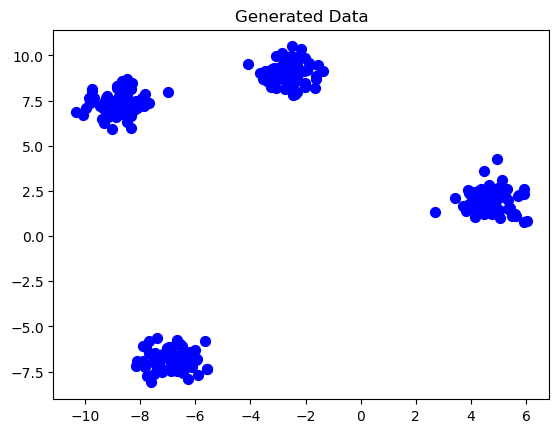

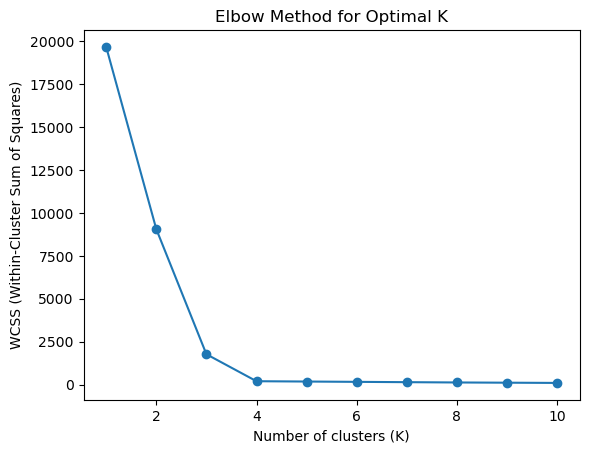

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Create a dataset with random data
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=0.6)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], s=50, c='blue', marker='o')
plt.title('Generated Data')
plt.show()

# Calculate WCSS for different values of K
wcss = []
K_values = range(1, 11)

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia is WCSS in KMeans

# Plot the Elbow Method Graph
plt.plot(K_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

---

## **Q3 : K-Means vs K-Means++**

**K-Means** and **K-Means++** are both popular clustering algorithms, but they differ mainly in how they initialize the cluster centroids. Here's a detailed explanation of both:

---

### **1. K-Means Algorithm**

**K-Means** is one of the simplest and most widely used clustering algorithms. It partitions the data into `K` clusters, where each data point belongs to the cluster with the nearest mean (centroid). The goal is to minimize the **WCSS (Within-Cluster Sum of Squares)**.

#### **K-Means Algorithm Steps:**

1. **Random Initialization**: Randomly initialize `K` centroids.
2. **Assign Data Points**: Assign each data point to the nearest centroid based on Euclidean distance.
3. **Update Centroids**: For each cluster, compute the new centroid by taking the mean of the points assigned to that cluster.
4. **Repeat**: Repeat steps 2 and 3 until the centroids no longer change or the maximum number of iterations is reached.

#### **Problems with K-Means:**
- **Random Initialization**: K-Means randomly initializes the centroids, which can lead to poor clustering if the centroids are poorly initialized. Sometimes the algorithm gets stuck in local minima and provides suboptimal clusters.

---

### **2. K-Means++ Algorithm**

**K-Means++** is an improved version of K-Means that addresses the issue of random initialization by using a smarter initialization strategy. The goal of K-Means++ is to spread out the initial centroids, leading to better clustering performance and faster convergence.

#### **K-Means++ Algorithm Steps:**

1. **First Centroid**: Randomly choose the first centroid from the data points.
2. **Distance-based Selection**:
   - For each data point `x`, compute its distance `D(x)` from the nearest already chosen centroid.
   - The probability of choosing a new centroid is proportional to `D(x)²`. This ensures that points farther from existing centroids have a higher probability of being chosen.
3. **Repeat**: Repeat step 2 until `K` centroids have been chosen.
4. **Standard K-Means**: Run the standard K-Means algorithm with these initialized centroids.

---

### **3. K-Means vs K-Means++: Key Differences**

| Feature               | **K-Means**                  | **K-Means++**               |
|-----------------------|------------------------------|-----------------------------|
| **Centroid Initialization** | Random initialization of centroids | Smarter initialization that spreads out centroids |
| **Performance**        | Can lead to suboptimal clustering and slow convergence | Faster convergence and better clustering |
| **Convergence**        | May converge to local minima (poor results) | Reduces the chances of local minima |
| **Computation Time**   | May require more iterations to converge | Requires fewer iterations, but slightly more time for initialization |
| **Use Cases**          | Useful when computational simplicity is more important | Useful when accuracy and faster convergence are required |

---

### **4. Why K-Means++ is Better?**

- **Better Initialization**: K-Means++ improves the initial centroids by ensuring they are spread out. This reduces the risk of poor clusters and the chances of getting stuck in local minima.
- **Faster Convergence**: By choosing better starting points, K-Means++ often converges faster, requiring fewer iterations.
- **More Stable Results**: K-Means++ typically produces more stable clusters, especially when dealing with non-globular data.

---

### **5. Mathematical Explanation**

#### **K-Means Initialization**:

- In the original K-Means algorithm, centroids are initialized randomly, which can lead to poor clusters. The formula for assigning points to clusters is based on minimizing the Euclidean distance between data points `x` and centroids `μ_j`:

```python
WCSS = Σ Σ || x_i - μ_j ||²
```

#### **K-Means++ Initialization**:

- K-Means++ initializes centroids based on distance. After selecting the first random centroid, subsequent centroids are chosen with a probability proportional to the square of the distance from the closest centroid:

```python
P(x) ∝ D(x)²
```

Where:
- `D(x)` is the distance of a point `x` to the nearest chosen centroid.

---

### **6. Python Implementation of K-Means++**

Here's a simple implementation of K-Means++ using `scikit-learn`:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Create a dataset with random data
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=0.6)

# K-Means without K-Means++
kmeans = KMeans(n_clusters=4, init='random', random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# K-Means with K-Means++
kmeans_pp = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pp.fit(X)
y_kmeans_pp = kmeans_pp.predict(X)

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
ax1.set_title('K-Means (Random Initialization)')

ax2.scatter(X[:, 0], X[:, 1], c=y_kmeans_pp, cmap='viridis')
ax2.set_title('K-Means++ (Smart Initialization)')

plt.show()
```

#### **Explanation:**
- We use `init='random'` for the traditional K-Means and `init='k-means++'` for K-Means++.
- The plot shows the differences between random initialization and K-Means++ initialization.

---

### **7. When to Use K-Means++?**

- **Data with well-separated clusters**: K-Means++ is especially useful when the data has distinct clusters, as it helps in getting a good initialization, reducing the number of iterations required.
- **Large datasets**: On larger datasets, poor initialization can lead to significantly worse performance. K-Means++ mitigates this by ensuring better centroids from the start.

---

### **Conclusion**

- **K-Means** uses random initialization, which can sometimes result in suboptimal clusters and slower convergence.
- **K-Means++** uses a smarter initialization technique that spreads out centroids more effectively, leading to faster convergence and better clustering results.


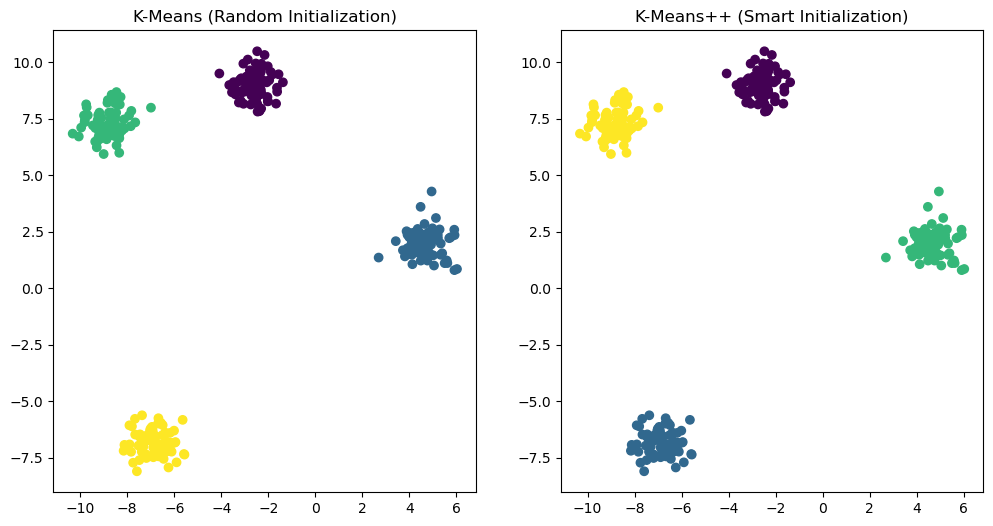

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Create a dataset with random data
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=0.6)

# K-Means without K-Means++
kmeans = KMeans(n_clusters=4, init='random', random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# K-Means with K-Means++
kmeans_pp = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pp.fit(X)
y_kmeans_pp = kmeans_pp.predict(X)

# Plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
ax1.set_title('K-Means (Random Initialization)')

ax2.scatter(X[:, 0], X[:, 1], c=y_kmeans_pp, cmap='viridis')
ax2.set_title('K-Means++ (Smart Initialization)')

plt.show()

---

## **Q4 : What is motivation to use the Random Forest algorithm in machine learning**

The motivation to use the Random Forest algorithm in machine learning stems from several key advantages and goals it addresses in predictive modeling and classification tasks:

### 1. **Accuracy**
Random Forest is known for providing high accuracy in many scenarios, outperforming other algorithms on complex datasets due to its ability to handle large data sets with higher dimensionality. It can produce a highly accurate classifier by combining multiple decision trees to reduce the model’s variance.

### 2. **Robustness**
Random Forest is less prone to overfitting than other algorithms. By averaging or combining the results of different trees, it balances out biases and errors. Each tree in the forest is built from a sample drawn with replacement (bootstrap sample) from the training set, allowing the model to maintain robustness even with noisy data.

### 3. **Handling Non-linear Data**
Unlike algorithms that assume a linear relationship, Random Forest can handle non-linearity effectively, using its hierarchical structure to fit complex datasets.

### 4. **Variable Importance**
One of the useful by-products of Random Forest is the straightforward ranking of features according to their importance in making accurate predictions. This is particularly beneficial in feature selection where understanding which features are contributing most to the prediction can be crucial.

### 5. **Minimal Preprocessing**
Random Forest requires little data preprocessing from the user, for example, it does not require normalization of data. It can handle both numerical and categorical data and can model binary, continuous, or categorical outcomes.

### 6. **Flexibility**
It can be used for both classification and regression tasks. For classification, it predicts the class with the most votes from individual trees, whereas for regression, it averages the outputs from individual trees.

### 7. **Ease of Use**
Random Forest models are relatively easy to tune and do not require much tweaking of parameters to get a decent model. Parameters like the number of trees and maximum depth are straightforward and do not require the understanding of the learning rate or regularization terms.

### 8. **Parallelism**
Each tree in the Random Forest is built independently, which allows the training process to be easily parallelized. This is a significant advantage when dealing with large datasets and computing systems capable of parallel processing.

### 9. **Handling Missing Values**
Random Forest can handle missing values. When there is a missing value in a variable, the algorithm will split the data into two parts: one where the data is missing and one where the data is not missing. This feature makes it versatile and powerful when dealing with real-world data that often has missing values.

### 10. **Out-of-Bag Error Estimation**
Random Forest provides an internal validation mechanism through the out-of-bag (OOB) error estimate. Each tree is trained using about two-thirds of the available data. The remaining one-third, not seen by the tree (called the OOB data), can be used to evaluate its performance. This method is an efficient means of cross-validation and provides a good estimate of model accuracy without the need for a separate test set.

### Conclusion
The motivation to use Random Forest is driven by its robustness, accuracy, and ease of use, making it a popular choice for many predictive modeling tasks. Its ability to perform well on both simple and complex data structures without extensive data preprocessing or tuning makes it a versatile tool in the machine learning toolbox.

Below is a simple Python implementation of the **Random Forest** algorithm using `sklearn` for a binary classification problem. I'll also include the necessary steps for loading the dataset, training the Random Forest model, and evaluating its performance.

### Sample Python Implementation of Random Forest

```python
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset - Using the breast cancer dataset from sklearn
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
```

### Explanation:

1. **Dataset**: I used the breast cancer dataset from `sklearn.datasets`. It is a binary classification problem where the target labels represent whether a tumor is benign (0) or malignant (1).
   
2. **Splitting Data**: The dataset is split into 80% training data and 20% testing data using `train_test_split`.

3. **Random Forest Classifier**: We initialize the `RandomForestClassifier` with 100 decision trees (`n_estimators=100`). You can increase the number of trees for better performance at the cost of computation time.

4. **Training**: The classifier is trained using the `fit` method on the training data.

5. **Prediction**: After training, predictions are made on the test set using the `predict` method.

6. **Evaluation**: We compute the accuracy using `accuracy_score`, display the confusion matrix with `confusion_matrix`, and generate a detailed classification report using `classification_report`.

### Output Example:
```bash
Accuracy: 96.49%
Confusion Matrix:
[[37  0]
 [ 3 74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       1.00      0.96      0.98        77

    accuracy                           0.96       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.97      0.96      0.97       114
```

### Key Points:
- **n_estimators**: This is the number of trees in the forest. In this case, we set it to 100. You can experiment with different values for better accuracy.
- **random_state**: This ensures that the split and the model's results can be reproduced.
- **accuracy_score**: This metric gives the percentage of correct predictions.

By using Random Forest, we can benefit from a robust classification model that handles missing data, performs well on unbalanced data, and provides insights into feature importance as well.

---